<a href="https://colab.research.google.com/github/adbioc/Spectroscopy/blob/main/CD_nov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NOV 2020 PLANS

## Three peptide classes 

- AAGY (FULLY OPEN)
- ABGY (FOLDED BUT!!)
- AMV (NICELY FOLDED)


## Peptide sequences 
### Amino acid **sequence** of the L-Ala, **all-L AAGY** peptide

Ac-Ala- Ala 2-Ala-Lys-Ala- Ala 6-Lys-Ala-Lys-Ala- Ala 11-Gly-Gly-Tyr-NH2

### Amino acid **sequence** of the Nα-acetylated Aib-based, **all-L ABGY** peptide

Ac-Ala-Aib2-Ala-Lys-Ala-Aib6-Lys-Ala-Lys-Ala-Aib11-Gly-Gly-Tyr-NH2

### Amino acid sequence of its **all-L-AMV** peptide analog

Ac-Ala-AMV2-Ala-Lys-Ala- AMV6-Lys-Ala-Lys-Ala- AMV11-Gly-Gly-Tyr-NH2

## For each peptide T-variation and TFE (helix inducing solvent) variation is avialable 
## Key observation  
- AAGY and ABGY shows NO isosbestic point in water
- AAGY at higher TFE and ABGY at lower TFE shows isosbestic point
- AMV shows clear isosbestic point in all condition (water/TFE)
- Sharpness of isosbestic point enhances with 
  - increase of TFE for AAGY and ABGY
  -For AMV sharpness in isosbestic point is moderate even in only water.

## Questions asked 
We want to explore
- whether can we get any thermodynamic correlation between three states especially in water (as in drug design water is acting as only solvent) and also in TFE
- can appearance of isosbestic point and its nature of sharpness indicates/add something more in its thermodynamic parameters
- can  these three sets of peptides and their thermodynamic aspects be used as model/template for understanding the characteristics/behavior of protein system (e.g IDP, induced helical system or fully ordered).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import networkx as nx
from sklearn.preprocessing import StandardScaler

# Let us first explore the spectral data character 
- There are two ways of reading pandas files 
- df=pd.read_excel(xlsfile,sheet_name=<sheetName>) 
- df=pd.ExcelFile(<xlsfile>) . We can find out the sheet names by df.sheet_names
- For simplicity we shall first explore all the 0% TFE data 

In [3]:
os.chdir("/content/drive/My Drive/Raja_CD/")


In [4]:
!ls *.xlsx

AMV_as_function_of_TFE_New.xlsx  AMV_Data.xlsx
AMV_Data_All.xlsx		 AMV_R1_R2_function_of_TFE_New.xlsx


# We may note that df11_amv contains the 0% TFE data for AMV 

In [6]:
os.chdir("/content/drive/My Drive/Raja_CD/")
df1_amv=pd.ExcelFile('AMV_Data_All.xlsx')
n1_amv=df1_amv.sheet_names
print(n1_amv)
df11_amv=pd.read_excel('AMV_Data_All.xlsx',sheet_name=n1_amv[1])
df11_amv # 11 stands for 0 %TFE 

['0% TFE', '10% TFE', '20% TFE', '30% TFE', 'Acetonitrile', 'Methanol']


,Wavelength,5,10,15,20,25,35,45,55
0,260.0,-4.69743,-4.69216,-4.59335,-4.59109,-4.59428,-4.49350,-4.49340,-4.29261
1,259.9,-4.43993,-4.44259,-4.34335,-4.34252,-4.34184,-4.23847,-4.25207,-4.04398
2,259.8,-4.18820,-4.19735,-4.09842,-4.09896,-4.09477,-3.98938,-4.01429,-3.80093
3,259.7,-3.94253,-3.95686,-3.85889,-3.86077,-3.85336,-3.74649,-3.78055,-3.56375
4,259.6,-3.70319,-3.72149,-3.62504,-3.62826,-3.61792,-3.51007,-3.55131,-3.33268
...,...,...,...,...,...,...,...,...,...
746,185.4,27.16252,29.23927,25.43796,24.76568,19.87110,20.54447,20.56201,14.25253
747,185.3,26.85694,28.90319,24.94204,24.49617,19.64284,20.14102,20.17355,13.62552
748,185.2,26.53267,28.54986,24.47876,24.25246,19.47371,19.73859,19.74603,12.93643
749,185.1,26.19751,28.17300,24.04278,24.02308,19.33502,19.34405,19.29988,12.20490


In [ ]:
os.chdir("/content/drive/My Drive/Raja_CD/AAGY")
df1_aagy=pd.ExcelFile('AAGY_Function of temperature.xlsx')
n1_aagy=df1_aagy.sheet_names
n1_aagy



['0% TFE', '20% TFE', '40% TFE', '50% TFE']

#*df11_AAGY* 0% TFE for AAGY

In [ ]:
df11_aagy=pd.read_excel('AAGY_Function of temperature.xlsx',sheet_name=n1_aagy[1])
df11_aagy

,Wavelength,2C,5C,10C,15C,25C,35C,45C
0,250.0,0.01926,0.12596,0.07842,0.03209,0.07500,0.05732,0.03538
1,249.9,0.01934,0.12896,0.07556,0.03385,0.07522,0.05889,0.03613
2,249.8,0.01953,0.13139,0.07253,0.03506,0.07512,0.06103,0.03714
3,249.7,0.01938,0.13307,0.06898,0.03563,0.07533,0.06423,0.03895
4,249.6,0.01956,0.13381,0.06523,0.03524,0.07522,0.06789,0.04162
...,...,...,...,...,...,...,...,...
646,185.4,11.07203,9.23307,8.26617,8.59353,6.32177,4.05528,4.11678
647,185.3,11.06353,9.15773,8.29079,8.59370,6.29796,3.99773,4.27936
648,185.2,11.06236,9.08487,8.32300,8.59407,6.27156,3.93654,4.45059
649,185.1,11.06905,9.01484,8.36331,8.59481,6.24262,3.87177,4.63086


# df11_ABGY 5% TFE for ABGY (0% TFE data not available)


In [ ]:
os.chdir("/content/drive/My Drive/Raja_CD/AAGY")
df1_abgy=pd.ExcelFile('ABGY_Function of temperature.xlsx')
n1_abgy=df1_abgy.sheet_names
n1_abgy

df11_abgy=pd.read_excel('ABGY_Function of temperature.xlsx',sheet_name=n1_abgy[1])

df11_abgy

,Wavelength,5,10,15,20,25,30,35,40,45,50,55
0,250,0.000400,0.00000,0.00040,-0.000267,0.00000,0.000133,-0.000267,0.000133,0.00000,0.00000,0.00000
1,249,-0.000667,-0.00787,-0.05667,-0.042130,-0.04347,-0.019470,-0.012800,-0.012530,-0.03493,0.00507,-0.08387
2,248,-0.011600,-0.02107,-0.10733,-0.072530,-0.08440,-0.049600,-0.034930,-0.035070,-0.06840,-0.00867,-0.16080
3,247,-0.034130,-0.04240,-0.15533,-0.097870,-0.12573,-0.090930,-0.068130,-0.068400,-0.10400,-0.04040,-0.23360
4,246,-0.069870,-0.07427,-0.20427,-0.124270,-0.17080,-0.144000,-0.113200,-0.113870,-0.14507,-0.08920,-0.30493
...,...,...,...,...,...,...,...,...,...,...,...,...
56,194,6.954670,6.19760,5.58027,5.012270,4.52627,4.346530,4.108670,3.974670,3.53627,3.60840,3.10347
57,193,7.510400,6.71093,6.07200,5.481070,4.98707,4.811070,4.585330,4.411870,3.98080,4.05453,3.57933
58,192,7.658930,6.83440,6.21960,5.634930,5.15093,4.998930,4.790130,4.576800,4.20813,4.23787,3.83440
59,191,7.327070,6.49720,5.96213,5.417870,4.96480,4.860530,4.671470,4.418000,4.18053,4.10480,3.82480


# Now let us have the temperature varying spectra for AMV, AAGY and ABGY 

In [ ]:
def findT(df):
  T=[]
  TTCD=df
  ll=list(TTCD.columns.values)
  ll.remove(ll[0])
  return np.array(ll)

# FOR AMV 

In [ ]:
T_amv=findT(df11_amv)
T_amv

array([ 5, 10, 15, 20, 25, 35, 45, 55])

## For AAGY 

In [ ]:
T_aagy=findT(df11_aagy)
T_aagy


array(['2C', '5C', '10C', '15C', '25C', '35C', '45C'], dtype='<U3')

# Since the temperature is coming in a format that contains a string we have to strip the string C 

In [ ]:
def tonumbers(s):
  # 20C=>20
  S=[]
  for i in s:
    S.append(int(re.search(r"\d+", i).group(0)))
  return(S)
T_aagyn=tonumbers(T_aagy)
T_aagyn

[2, 5, 10, 15, 25, 35, 45]

## For ABGY 

In [ ]:
T_abgy=findT(df11_abgy)
T_abgy # Comes in numbers - no conversion required

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55])

# Now Let us draw the spectra for each set (AMV,AAGY,ABGY)at 0% (or at 5% TFE, when 0% data is not available)  

In [ ]:
def readCDT(df,T,pepname):# T must be in numbers 
  
  X=df.values
  lam=X[:,0]
  lam=np.delete(lam,0)
  X=np.delete(X, 0, axis=1)
  X=np.delete(X, 0, axis=0)
  r,c=X.shape
  plt.figure(figsize=(8, 7))
  for i in range(c):
      plt.plot(lam,X[:,i],label=str(T[i]))
      plt.ylabel(r'$[\theta ^o] cm^2 dmol^{-1}\cdot 10^{-3} $')
      plt.xlabel(r'$\lambda (nm)$')
      plt.title(['$T$ Variation in C',pepname])
      plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  return T,lam,X 

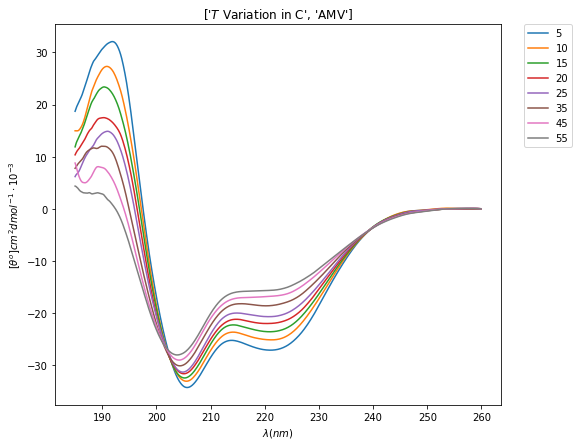

In [ ]:
 T_amv,lam_amv,X_amv = readCDT(df11_amv,T_amv,'AMV')

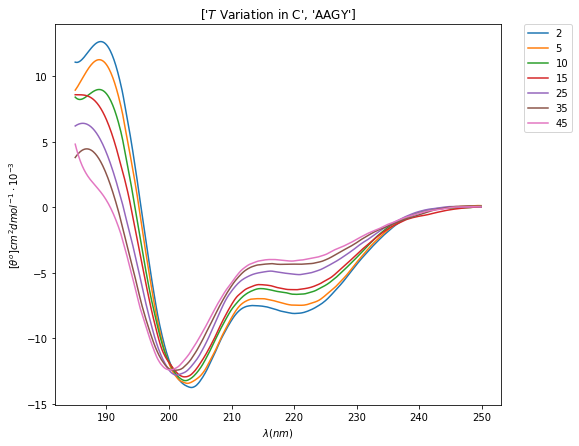

In [ ]:
 T_aagy,lam_aagy_amv,X_aagy = readCDT(df11_aagy,T_aagyn,'AAGY')

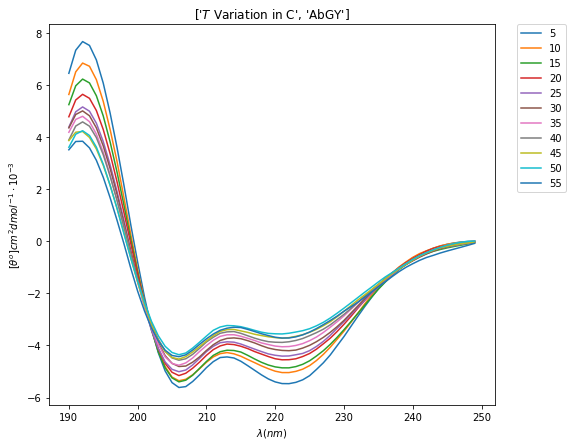

In [ ]:
 T_abgy,lam_abgy_amv,X_abgy = readCDT(df11_abgy,T_abgy,'AbGY')